<a href="https://colab.research.google.com/github/kimfungg/Python-Project-3/blob/master/Project_3_Team_Joy_Kimberly_Kim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Packages installed and dataframe created based on cdc dataset**

In [ ]:
!pip install pandas
!pip install sodapy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import unique
from sodapy import Socrata
client = Socrata("chronicdata.cdc.gov", None)
results = client.get("g4ie-h725", limit=816000)
# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

# Total Number of Rows and Columns in dataset

In [ ]:
#Determine number of rows/columns in dataframe
results_df.shape

(814937, 26)

# **Chronic Diseases and the Number of Indicators (table)**

In [ ]:
# Show the number of indicators in indicator group in "topic"
topic_count=results_df.groupby(['topic'])['question'].nunique().sort_values(ascending=False)
print(topic_count)

topic
Nutrition, Physical Activity, and Weight Status    37
Diabetes                                           20
Cancer                                             20
Cardiovascular Disease                             18
Tobacco                                            16
Chronic Obstructive Pulmonary Disease              16
Alcohol                                            16
Overarching Conditions                             16
Arthritis                                          10
Oral Health                                         9
Asthma                                              9
Older Adults                                        4
Chronic Kidney Disease                              4
Reproductive Health                                 3
Mental Health                                       3
Immunization                                        1
Disability                                          1
Name: question, dtype: int64


# Total Number of Indicators in dataset

In [ ]:
# Display the total indicators for 17 groups
topic_count=results_df.groupby(['topic'])['question'].nunique().sort_values(ascending=True)
topic_count.sum()

203

# **Chronic Diseases & Number of Indicators** (bar graph)

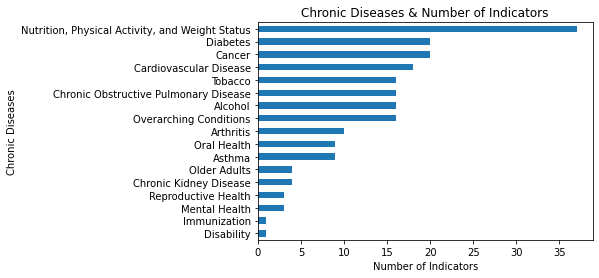

In [ ]:
# Bar graph to show which disease has the largest number of metrics
topic_count_graph=topic_count.plot(kind='barh')
plt.title('Chronic Diseases & Number of Indicators')
plt.xlabel('Number of Indicators')
plt.ylabel('Chronic Diseases')
plt.show()

# **Diabetes dataset** (subset of cdc data)
dtype for all fields were object-- had to convert 'datavalue' to numeric form for analysis

In [ ]:
#The chronic disease chosen for analysis was diabetes, so the dataset was filtered to show diabetes only
diabetes=results_df[results_df['topic']=='Diabetes']

#Convert datavalue to integer, because currently it's an object
diabetes['datavalue'] = pd.to_numeric(diabetes['datavalue'])
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110251 entries, 292 to 785943
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   yearstart                    110251 non-null  object 
 1   yearend                      110251 non-null  object 
 2   locationabbr                 110251 non-null  object 
 3   locationdesc                 110251 non-null  object 
 4   datasource                   110251 non-null  object 
 5   topic                        110251 non-null  object 
 6   question                     110251 non-null  object 
 7   datavalueunit                102310 non-null  object 
 8   datavaluetype                110251 non-null  object 
 9   datavalue                    60259 non-null   float64
 10  datavaluealt                 60259 non-null   object 
 11  lowconfidencelimit           55017 non-null   object 
 12  highconfidencelimit          55017 non-null   object 
 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


# **Datasources & Number of Indicators**

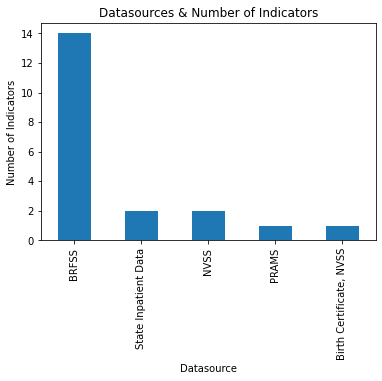

In [ ]:
diabetes_datasource=diabetes.groupby(['datasource'])['question'].nunique().sort_values(ascending=False)
diabetes_datasource.plot(kind='bar')
plt.title('Datasources & Number of Indicators')
plt.xlabel('Datasource')
plt.ylabel('Number of Indicators')
plt.show()


# **"Prevalence of diagnosed diabetes among adults age >= 18 years" in 2018 dataset:**

In [ ]:
#Diabetes filtered on datavalues of "Prevalence of diagnosed diabetes..." question reported in 2018
diabetes_prev= diabetes[(diabetes['question']=='Prevalence of diagnosed diabetes among adults aged >= 18 years') & (diabetes['yearstart']=='2018')]
diabetes_prev.head()

In [ ]:
diabetes_prev.tail()

# **Prevalence of Diagosed Diabetes (2018)** - (Age-Adjusted Rate)

United States Result:

In [ ]:
#Diabetes filtered on datavalues of "Prevalence of diagnosed diabetes..." question reported in 2018
diabetes_prev_US= diabetes[(diabetes['question']=='Prevalence of diagnosed diabetes among adults aged >= 18 years') & (diabetes['yearstart']=='2018') & (diabetes['locationabbr']=='US') & (diabetes['stratificationcategory1']=='Overall') & (diabetes['datavaluetype']=='Age-adjusted Prevalence')]
diabetes_prev_US
diabetes_prev_US_result= diabetes_prev_US[['locationabbr','datavalue','datavalueunit']]
diabetes_prev_US_result

,locationabbr,datavalue,datavalueunit
44238,US,9.8,%


Top 10 States Results:

In [ ]:
#Table showing TOP 10 age-adjusted prevalence results of "Prevalence of diagnosed diabetes..." question in 2018
diabetes_prev_age= diabetes_prev[(diabetes['datavaluetype']=='Age-adjusted Prevalence') & (diabetes['stratificationcategory1']=='Overall')]
diabetes_prev_age_table=diabetes_prev_age[['locationabbr','datavalue','datavalueunit','datavaluetype']].sort_values('datavalue', ascending=False)
dia_prev_age_10=diabetes_prev_age_table.head(10)
dia_prev_age_10

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,locationabbr,datavalue,datavalueunit,datavaluetype
43383,GU,15.4,%,Age-adjusted Prevalence
42181,WV,13.6,%,Age-adjusted Prevalence
42715,PR,13.2,%,Age-adjusted Prevalence
36891,MS,13.0,%,Age-adjusted Prevalence
58214,LA,12.9,%,Age-adjusted Prevalence
45243,AL,12.8,%,Age-adjusted Prevalence
46862,AR,12.5,%,Age-adjusted Prevalence
58898,TN,12.2,%,Age-adjusted Prevalence
38843,TX,12.2,%,Age-adjusted Prevalence
54174,KY,12.1,%,Age-adjusted Prevalence


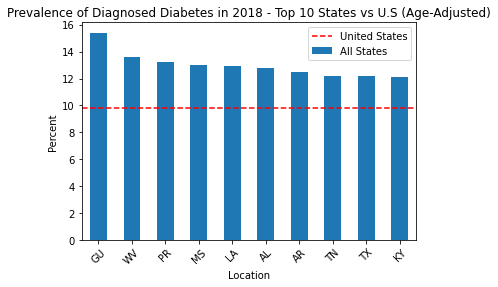

In [ ]:
# Top 10 states results compared to the United States overall result
dia_prev_age_10.plot(kind='bar', x='locationabbr',y='datavalue')
plt.axhline(y=9.8,linestyle='dashed',color='red')
plt.legend(('United States','All States'))
plt.xticks(rotation=45)
plt.title('Prevalence of Diagnosed Diabetes in 2018 - Top 10 States vs U.S (Age-Adjusted)')
plt.ylabel('Percent')
plt.xlabel('Location')
plt.show()

# **Prevalence of Diagosed Diabetes (2018)** - (Crude Rate)

United States Result:

In [ ]:
#Diabetes filtered on datavalues of "Prevalence of diagnosed diabetes..." question for U.S reported in 2018
diabetes_crude_prev_US= diabetes[(diabetes['question']=='Prevalence of diagnosed diabetes among adults aged >= 18 years') & (diabetes['yearstart']=='2018') & (diabetes['locationabbr']=='US') & (diabetes['stratificationcategory1']=='Overall')& (diabetes['datavaluetype']=='Crude Prevalence')]
diabetes_crude_prev_US_result= diabetes_crude_prev_US[['locationabbr','datavalue','datavalueunit']]
diabetes_crude_prev_US_result

,locationabbr,datavalue,datavalueunit
51151,US,10.9,%


Top 10 States Results:

In [ ]:
#Table showing TOP 10 crude prevalence results of "Prevalence of diagnosed diabetes..." question in 2018
diabetes_prev_crude= diabetes_prev[(diabetes['datavaluetype']=='Crude Prevalence') & (diabetes['stratificationcategory1']=='Overall')]
diabetes_prev_crude_table=diabetes_prev_crude[['locationabbr','datavalue','datavalueunit','datavaluetype']].sort_values('datavalue', ascending=False)
dia_prev_crude_10=diabetes_prev_crude_table.head(10)
dia_prev_crude_10

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,locationabbr,datavalue,datavalueunit,datavaluetype
42003,WV,16.2,%,Crude Prevalence
35791,PR,15.5,%,Crude Prevalence
38494,AL,14.5,%,Crude Prevalence
34104,MS,14.3,%,Crude Prevalence
48106,LA,14.1,%,Crude Prevalence
41360,AR,13.9,%,Crude Prevalence
38436,TN,13.8,%,Crude Prevalence
310,GU,13.7,%,Crude Prevalence
49804,KY,13.7,%,Crude Prevalence
34511,SC,13.3,%,Crude Prevalence


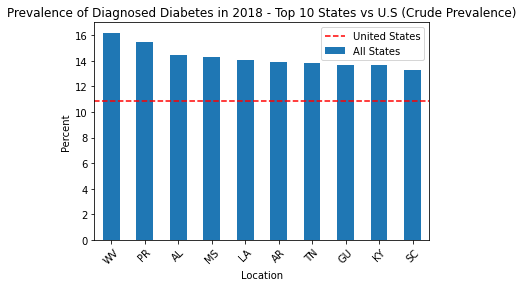

In [ ]:
# Top 10 states results compared to the United States overall result
dia_prev_crude_10.plot(kind='bar', x='locationabbr',y='datavalue')
plt.axhline(y=10.9,linestyle='dashed',color='red')
plt.legend(('United States','All States'))
plt.xticks(rotation=45)
plt.title('Prevalence of Diagnosed Diabetes in 2018 - Top 10 States vs U.S (Crude Prevalence)')
plt.ylabel('Percent')
plt.xlabel('Location')
plt.show()

# **Hospitalizations Related to Diabetes by State (2015)**

In [ ]:
#Diabetes filtered on datavalues of "Hospitalizations..." question reported in 2015
diabetes_hosp= diabetes[(diabetes['question']=='Hospitalization with diabetes as a listed diagnosis') & (diabetes['yearstart']=='2015')]
diabetes_hosp_no= diabetes_hosp[(diabetes['datavaluetype']=='Number') & (diabetes['stratificationcategory1']=='Overall')]
diabetes_hosp_no_table=diabetes_hosp_no[['locationabbr','datavalue','datavaluetype','datavaluefootnote']].sort_values('datavalue', ascending=False)
diabetes_hosp_no_table.head(10)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,locationabbr,datavalue,datavaluetype,datavaluefootnote
311550,FL,465951.0,Number,Estimate is based on the first 3 quarters of 2...
316467,MI,218417.0,Number,Estimate is based on the first 3 quarters of 2...
311551,NC,186061.0,Number,Estimate is based on the first 3 quarters of 2...
311654,NJ,152866.0,Number,Estimate is based on the first 3 quarters of 2...
315733,MA,112810.0,Number,Estimate is based on the first 3 quarters of 2...
328177,AZ,107755.0,Number,Estimate is based on the first 3 quarters of 2...
309445,MD,104852.0,Number,Estimate is based on the first 3 quarters of 2...
309820,KY,102795.0,Number,Estimate is based on the first 3 quarters of 2...
328542,WI,90186.0,Number,Estimate is based on the first 3 quarters of 2...
312570,SC,89356.0,Number,Estimate is based on the first 3 quarters of 2...


# **Diabetes Mortality in U.S (2010-2017)**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


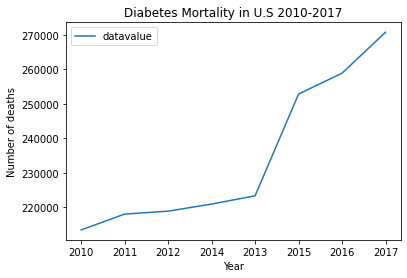

In [ ]:
#Diabetes filtered on datavalues of "Mortalities..." question reported for the US across all years
diabetes_mort= diabetes[(diabetes['question']=='Mortality due to diabetes reported as any listed cause of death') & (diabetes['locationabbr']=='US')]
diabetes_mort_no= diabetes_mort[(diabetes['datavaluetype']=='Number') & (diabetes['stratificationcategory1']=='Overall')]
diabetes_mort_table=diabetes_mort_no[['locationabbr','yearstart','datavalue','datavaluetype','datavaluefootnote']].sort_values('datavalue', ascending=False)
diabetes_mort_graph=diabetes_mort_no[['yearstart','datavalue']].sort_values('datavalue')
#line graph showing that # of diabetes deaths are increasing throughout the years 2010-2017
diabetes_mort_graph.plot(kind='line',x='yearstart',y='datavalue')
plt.title('Diabetes Mortality in U.S 2010-2017')
plt.ylabel('Number of deaths')
plt.xlabel('Year')
plt.show()

## **"AHA" moment**
Valuable insight for data wrangling

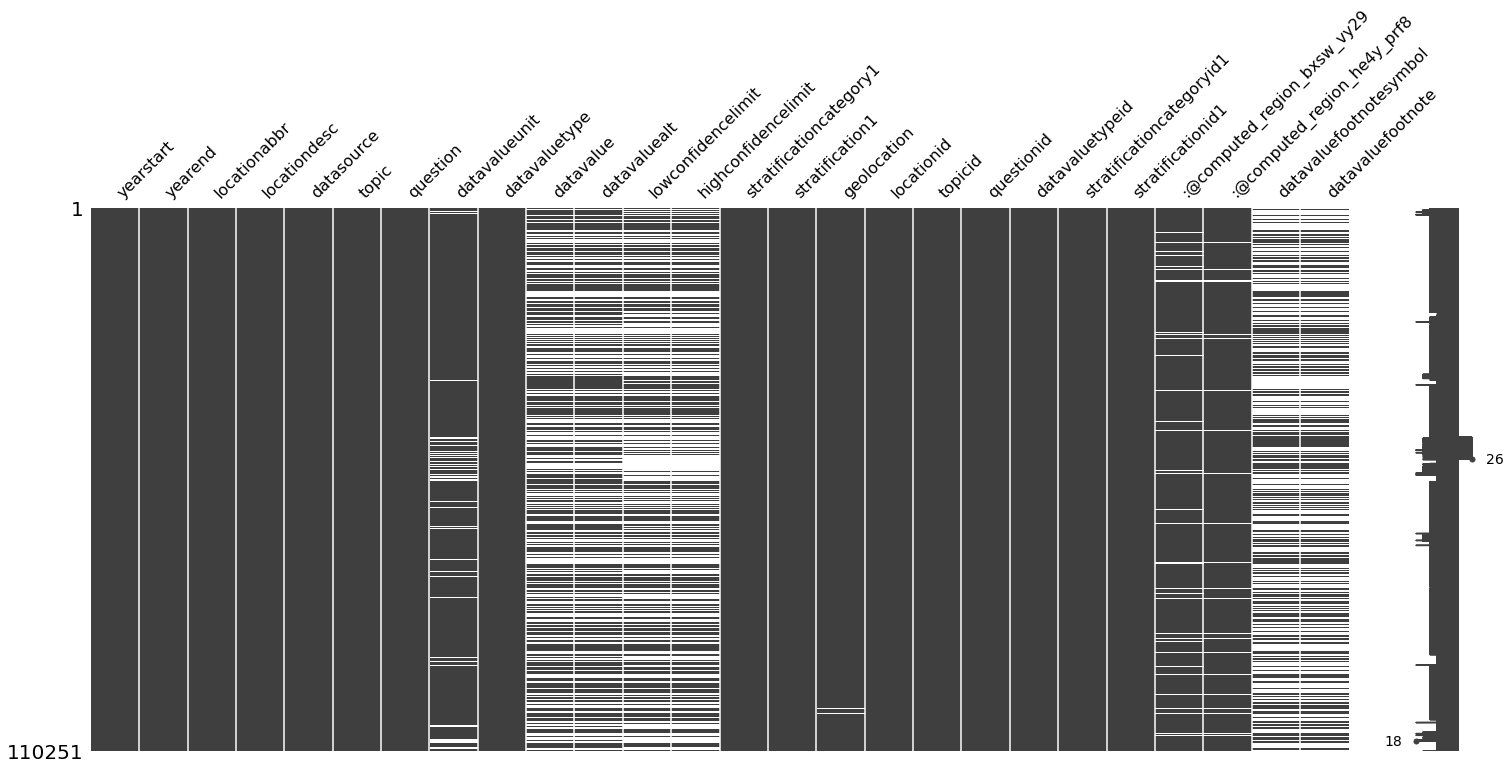

In [ ]:
# Visualizing missing values with missingno
!pip install missingno
%matplotlib inline
import missingno as msno
msno.matrix(diabetes)

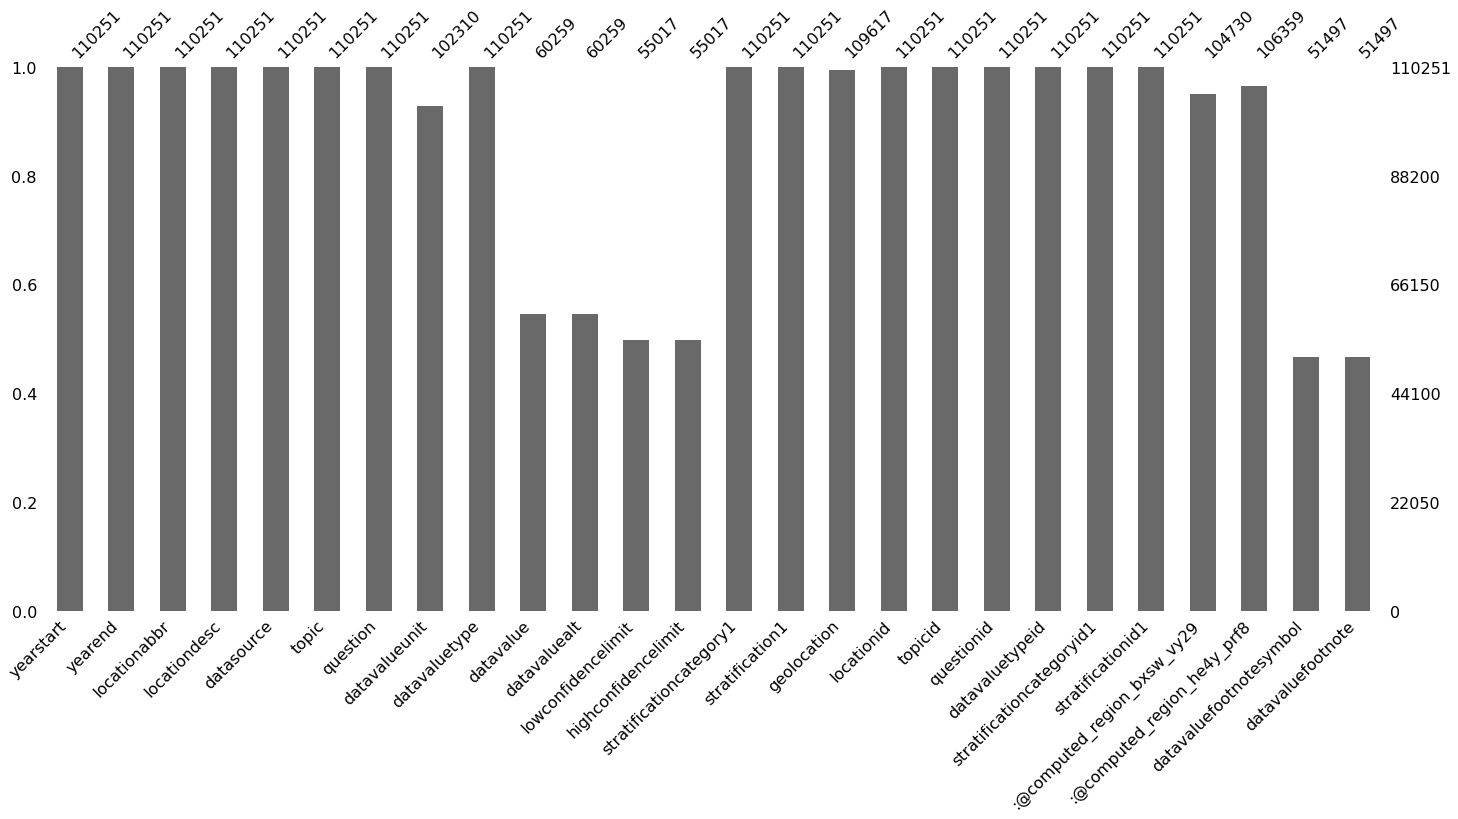

In [ ]:
# Visualize the # of missing values as a bar chart
msno.bar(diabetes)

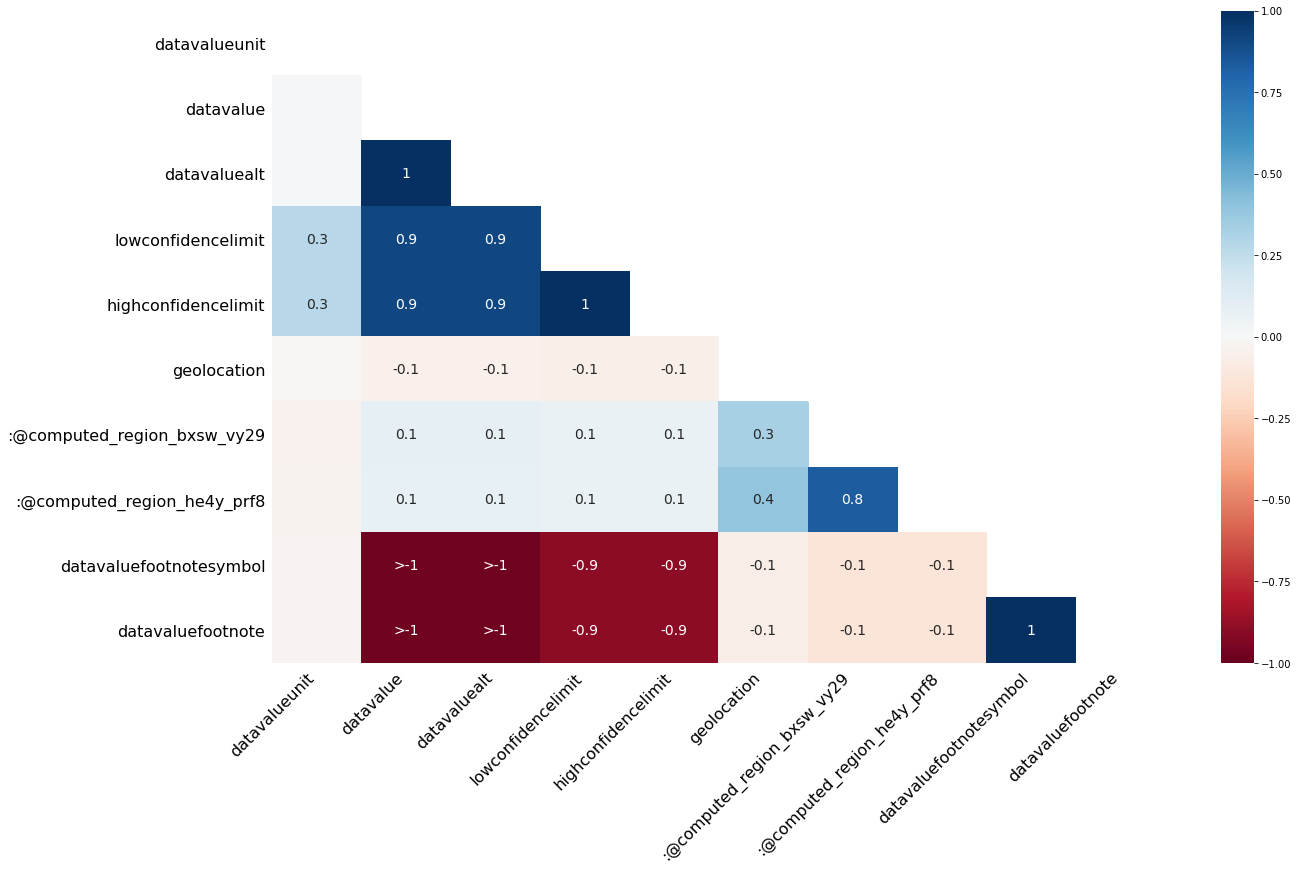

In [ ]:
# Visualize the correlation between the # of missing
#values in different column as a heatmap
msno.heatmap(diabetes)